# Stock price evolution equation 
## (Geometric Brownian Motion)

$S_t = S_0 e^{\mu t+\sigma \sqrt{t} \epsilon}$

In [1]:
from derivatives_pricing.sim.wiener import *
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def f(vol,mu):
    S0 = 100
    T = 1
    N = 255
    n = 100
    mean,time,results = get_path(S0,vol,mu,T,N,n)
    plt.figure(figsize=(11,5));
    plt.ylim(S0*0.5,S0*1.8);
    plt.title("Brownian motion - Paths for stock S");
    plt.plot(time,results);
    pass

In [3]:
interact(f,vol=(0.05,0.5,0.05),mu=(-0.2,0.2,0.05));

interactive(children=(FloatSlider(value=0.25, description='vol', max=0.5, min=0.05, step=0.05), FloatSlider(va…

OBS: We will be pricing derivative, so from this point on instead of the expected return of the stock, we will use the risk free rate to simulate the brownian motion.<br>

$S_t = S_0 e^{r_f t+\sigma \sqrt{t} \epsilon}$

In [4]:
from derivatives_pricing.securities.derivatives import *

In [5]:
ticker = 'IBM'
strike = 155
maturity = '2019-4-2'
type_ = 'european'
c = call(ticker,strike,maturity,type_='european',check_BS=1)
print('Annualized volatility: {}'.format(c.std))

Summary of past returns for IBM
count    649.000000
mean       0.000021
std        0.012274
min       -0.081427
25%       -0.005995
50%       -0.000394
75%        0.005716
max        0.061007
Name: WIKI/IBM - Close, dtype: float64
std: 0.19469201899849586
stock price: 151.91
Type of derivative: call
Annualized volatility: 0.19469201899849586


In [6]:
price = c.price()

iteration: 1 : 11.24836112935261
iteration: 2 : 8.3626329788969
iteration: 3 : 10.822718330602912
iteration: 4 : 7.72872037088937
iteration: 5 : 9.472714397099615
iteration: 6 : 9.105335685871857
call_BS: 9.608285007278937
MC result: 9.105335685871857
BS minus MC = -0.5029493214070797


In [7]:
c.n=10000
c.N=10000
print('Price {}'.format(c.price()))

iteration: 1 : 9.614349176372706
iteration: 2 : 9.643812525405421
iteration: 3 : 9.46753910560587
iteration: 4 : 9.93637099120166
iteration: 5 : 9.528109181044973
iteration: 6 : 9.755621482412327
call_BS: 9.608285007278937
MC result: 9.755621482412327
BS minus MC = 0.14733647513338965
Price (9.755621482412327, 0.14733647513338965)


## Show brownian path:

9.38549779748872


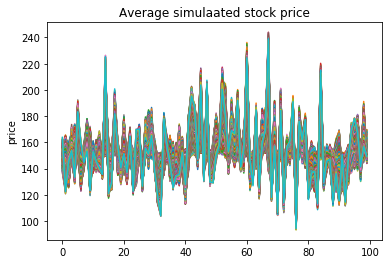

In [8]:
c.n= 500
c.N = 500
c.build_path()
plt.title('Average simulaated stock price')
plt.ylabel('price')
plt.plot(c.results[:,-100:].T);

# American put Option

In [9]:
ticker = 'AAPL'
strike = 170
maturity = '2019-4-2'
type_ = 'american'
p = put(ticker,strike,maturity,type_='american',check_BS=1)
p.std_horiz=3
print('Annualized volatility: {}'.format(p.std))

Summary of past returns for AAPL
count    648.000000
mean      -0.000563
std        0.014028
min       -0.061000
25%       -0.007636
50%       -0.000440
75%        0.005651
max        0.070328
Name: WIKI/AAPL - Close, dtype: float64
std: 0.22251056375357017
stock price: 168.34
Type of derivative: put
Annualized volatility: 0.22251056375357017


In [10]:
p.build_path();
price = p.price();

13.347623720969459
14.190463951166645


In [11]:
p.n=10000
p.N=10000
print('Price {}'.format(p.price()))

12.441029679266231
Price (12.269624296248974, 'nan')


12.538955809546978


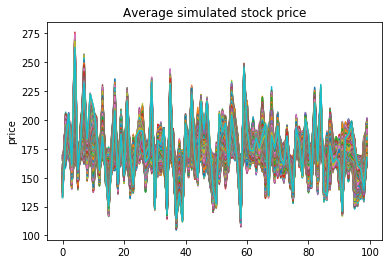

In [12]:
p.n= 10000
p.N = 500
p.build_path()
plt.title('Average simulated stock price')
plt.ylabel('price')
plt.plot(p.results[:,-100:].T);